## Importing Packages

In [ ]:
import numpy as np
import pandas as pd

## Reading and Separating Data

In [ ]:
df_ml = pd.read_csv("../data/data_ml.csv")

In [ ]:
separation_date = "2013-12-31"
df_train = df_ml.query("date < @separation_date").copy()
df_test = df_ml.query("@separation_date <= date & date < '2018-12-31'").copy()

In [ ]:
columns_to_drop = [
    "stock_id", "date", # non-feature identifiers
    "R1M_Usd", "R3M_Usd", "R6M_Usd", "R12M_Usd", # numerical labels
    "R1M_Usd_C", "R12M_Usd_C" # categorical labels
]

features = list(df_ml.drop(columns=columns_to_drop).columns)

In [ ]:
X_train = df_train[features]
y_train = df_train["R1M_Usd_C"]

## Looking at Correlation Structure of Features

In [ ]:
df_corr = X_train.corr()

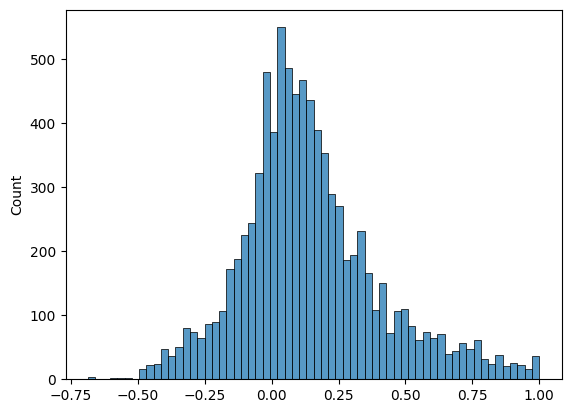

In [ ]:
import seaborn as sns
corr = np.corrcoef(X_train, rowvar=False) # calculating correlation matrix
np.fill_diagonal(corr, np.nan) # filling the diagonal with nans
sns.histplot(corr.flatten(), legend=False); # plotting histogram

## Clustering by Correlation

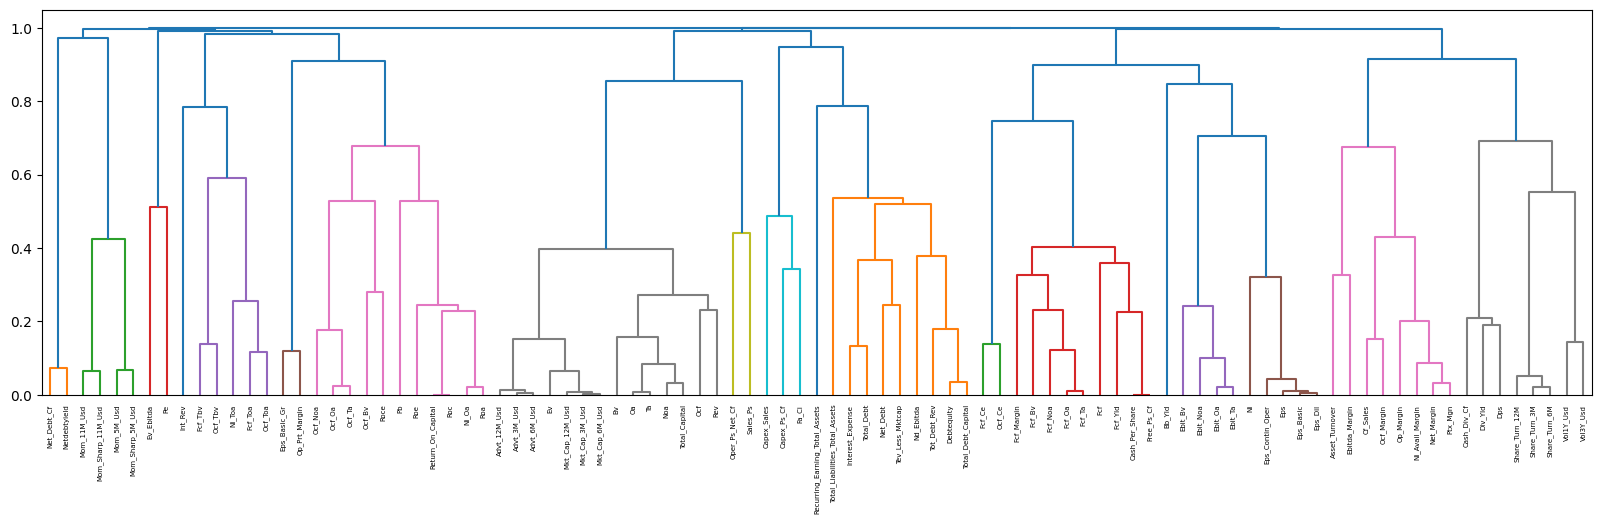

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
dissimilarity = 1 - abs(df_corr)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=X_train.columns, orientation='top', 
           leaf_rotation=90);

In [ ]:
# Clusterize the data
threshold = 0.3
labels = fcluster(Z, threshold, criterion='distance')

# Show the cluster
labels

array([14, 14, 14, 36, 35, 15, 18, 20, 40, 30, 38, 23, 40, 40, 32, 32, 32,
       32, 37, 33, 33,  9, 33, 33, 14,  4, 19, 31, 28, 27, 29, 28, 28, 28,
        6,  7, 30, 30,  8, 21, 14, 14, 14,  2,  3,  2,  3, 24, 22,  1, 39,
        1, 34, 39, 12,  7, 15, 15, 15, 11, 27, 38, 10, 10, 10,  6,  7, 39,
        9, 16, 13,  5, 39, 26, 12, 15, 12, 12, 11, 12, 17, 41, 41, 41, 15,
       22, 23, 15, 21, 23, 25, 42, 42], dtype=int32)

In [ ]:
# Keep the indices to sort labels
labels_order = np.argsort(labels)

# Build a new dataframe with the sorted columns
for idx, i in enumerate(X_train.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(X_train[i])
    else:
        df_to_append = pd.DataFrame(X_train[i])
        clustered = pd.concat([clustered, df_to_append], axis=1)

## Viewing Heatmap of Features Sorted by Cluster

<Axes: >

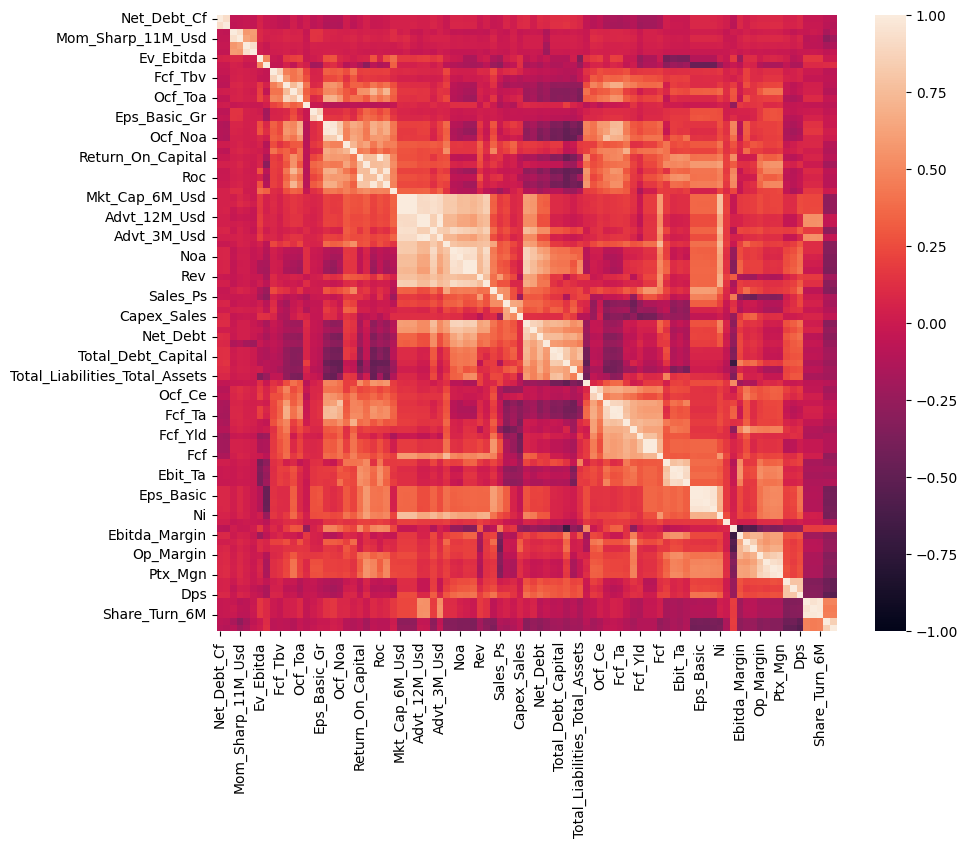

In [ ]:
plt.figure(figsize=(10,8))
correlations = clustered.corr()
sns.heatmap(correlations, vmin=-1, vmax=1)

## Printing out Feature Groupings for Visual Inspection

In [ ]:
pd.set_option('display.max_rows', 100)
df_features_grouping = pd.DataFrame({
    "feature":features,
    "grouping":labels
})
df_features_grouping.sort_values(by="grouping", inplace=True)
df_features_grouping

,feature,grouping
49,Net_Debt_Cf,1
51,Netdebtyield,1
43,Mom_11M_Usd,2
45,Mom_Sharp_11M_Usd,2
46,Mom_Sharp_5M_Usd,3
44,Mom_5M_Usd,3
25,Ev_Ebitda,4
71,Pe,5
65,Ocf_Tbv,6
34,Fcf_Tbv,6


## Calculating Average Absolute Correlation within Each Group

In [ ]:
group_num = []
group_size = []
avg_corr = []
for ix_group in np.unique(labels):
    grouped_features = df_features_grouping.query("grouping==@ix_group")["feature"].values
    df_grouped = X_train.loc[:, list(grouped_features)]
    if len(df_grouped.columns) > 1:
        corr = np.corrcoef(df_grouped, rowvar=False)
        pairwise_correlations = corr[np.triu_indices(len(grouped_features), k=1)]
        avg_abs_corr = np.mean(np.abs(pairwise_correlations))
    else:
        avg_abs_corr = np.nan
    group_num.append(ix_group)
    group_size.append(len(grouped_features))
    avg_corr.append(np.round(avg_abs_corr, 2))

df_group_correlation = pd.DataFrame({
    "group":group_num,
    "size":group_size,
    "avg_corr":avg_corr,
}).sort_values(by="avg_corr", ascending=False)

df_group_correlation

,group,size,avg_corr
32,33,4,0.98
40,41,3,0.97
1,2,2,0.94
0,1,2,0.93
2,3,2,0.93
13,14,7,0.93
38,39,4,0.89
8,9,2,0.88
9,10,3,0.88
22,23,3,0.87


## Selecting One Feature Per Group

I did this by fitting a simple logistic regression to each feature in a group, and then keeping the one that had the highest accuracy.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
features_selected = []
for ix_group in np.unique(labels):
    grouped_features = df_features_grouping.query("grouping==@ix_group")["feature"].values
    df_grouped = X_train.loc[:, list(grouped_features)]
    features = []
    cv_scores = []
    for ix_feature in df_grouped.columns:
        model = LogisticRegression()
        cv_accuracy = np.mean(cross_val_score(model, X_train[[ix_feature]], y_train))
        features.append(ix_feature)
        cv_scores.append(cv_accuracy)
    df_scores = pd.DataFrame({
        "feature":features,
        "cv_accuracy":cv_scores,
    }).sort_values(by="cv_accuracy", ascending=False)
    feature_kept = df_scores.head(1)["feature"].iloc[0]
    features_selected.append(feature_kept)
    print(feature_kept)

Netdebtyield
Mom_Sharp_11M_Usd
Mom_5M_Usd
Ev_Ebitda
Pe
Fcf_Tbv
Ni_Toa
Int_Rev
Op_Prt_Margin
Ocf_Ta
Ocf_Bv
Roe
Pb
Mkt_Cap_6M_Usd
Ta
Oper_Ps_Net_Cf
Sales_Ps
Capex_Ps_Cf
Fa_Ci
Capex_Sales
Total_Debt
Net_Debt
Debtequity
Nd_Ebitda
Total_Liabilities_Total_Assets
Recurring_Earning_Total_Assets
Ocf_Ce
Fcf_Noa
Fcf_Margin
Fcf_Yld
Fcf
Ebit_Oa
Eps
Ni
Bb_Yld
Asset_Turnover
Ebitda_Margin
Cf_Sales
Ptx_Mgn
Dps
Share_Turn_12M
Vol1Y_Usd


## Examining the Histogram of Correlations For the Selected Features

There are still some that are above 0.8, but nearly all are between -0.6 and +0.6.

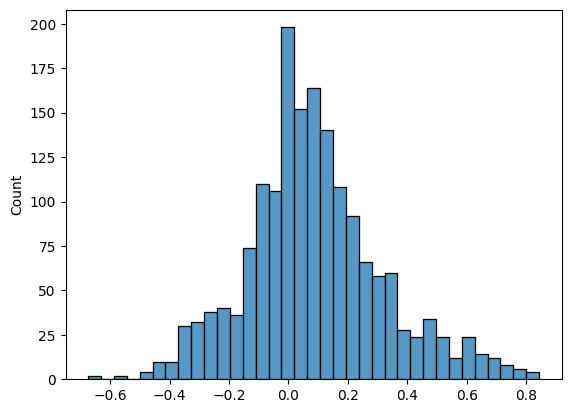

In [ ]:
corr = np.corrcoef(X_train[features_selected], rowvar=False) # calculating correlation matrix
np.fill_diagonal(corr, np.nan) # filling the diagonal with nans
sns.histplot(corr.flatten(), legend=False); # plotting histogram

## Writing Selected Features to CSV

In [ ]:
df_features_selected = pd.DataFrame({
    "feature":features_selected
})
df_features_selected

,feature
0,Netdebtyield
1,Mom_Sharp_11M_Usd
2,Mom_5M_Usd
3,Ev_Ebitda
4,Pe
5,Fcf_Tbv
6,Ni_Toa
7,Int_Rev
8,Op_Prt_Margin
9,Ocf_Ta


In [ ]:
df_features_selected.to_csv("../data/features_selected.csv", index=False)

## References

https://www.kaggle.com/code/sgalella/correlation-heatmaps-with-hierarchical-clustering

## OLD CODE

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(12,12))
# sns.heatmap(df_corr);

In [ ]:
# group = 2

# grouped_features = df_features_grouping.query("grouping==@group")["feature"].values
# df_grouped = X_train.loc[:, list(grouped_features)]
# corr = np.corrcoef(df_grouped, rowvar=False)
# pairwise_correlations = corr[np.triu_indices(len(grouped_features), k=1)]
# avg_abs_corr = np.mean(np.abs(pairwise_correlations))
# avg_abs_corr

In [ ]:
# group = 40

# grouped_features = df_features_grouping.query("grouping==@group")["feature"].values
# df_grouped = X_train.loc[:, list(grouped_features)]
# corr = np.corrcoef(df_grouped, rowvar=False)
# pairwise_correlations = corr[np.triu_indices(len(grouped_features), k=1)]
# pairwise_correlations
#avg_abs_corr = np.mean(np.abs(pairwise_correlations))
#avg_abs_corr

In [ ]:
# selected_features = []
# for ix_group in np.unique(labels):
#     grouped_features = df_features_grouping.query("grouping==@ix_group")["feature"].values
#     df_grouped = X_train.loc[:, list(grouped_features)]
#     # if len(df_grouped.columns) > 1:
#     #     corr = np.corrcoef(df_grouped, rowvar=False)
#     #     pairwise_correlations = corr[np.triu_indices(len(grouped_features), k=1)]
#     #     avg_abs_corr = np.mean(np.abs(pairwise_correlations))
#     # else:
#     #     avg_abs_corr = np.nan
#     # print(ix_group, len(grouped_features), np.round(avg_abs_corr, 2))
#     chosen_feature = df_grouped.columns[0]
#     selected_features.append(chosen_feature)
#     #print(chosen_feature)
# selected_features

In [ ]:
#len(selected_features)

In [ ]:
# corr = np.corrcoef(X_train[selected_features], rowvar=False) # calculating correlation matrix
# np.fill_diagonal(corr, np.nan) # filling the diagonal with nans
# sns.histplot(corr.flatten(), legend=False); # plotting histogram

In [ ]:
#np.triu(corr)

In [ ]:
# X_train[["Mkt_Cap_12M_Usd"]]
# y_train

In [ ]:
# model = LogisticRegression()
#model.fit(X_train[["Mkt_Cap_12M_Usd"]], y_train)

In [ ]:
# cross_val_score(model, X_train[["Mkt_Cap_12M_Usd"]], y_train)

In [ ]:
# group = 13

# grouped_features = df_features_grouping.query("grouping==@group")["feature"].values
# df_grouped = X_train.loc[:, list(grouped_features)]
# df_grouped

In [ ]:
# features = []
# correlations = []
# for ix_feature in df_grouped.columns:
#     #print(ix_feature)
#     model = LogisticRegression()
#     #cv_accuracy = np.mean(cross_val_score(model, X_train[[ix_feature]], y_train))
#     cv_accuracy = np.abs(np.corrcoef(X_train[ix_feature], y_train)[0, 1])
#     features.append(ix_feature)
#     correlations.append(cv_accuracy)
# pd.DataFrame({
#     "feature":features,
#     "correlation":correlations
# }).sort_values(by="correlation", ascending=False)

In [ ]:
# features = []
# correlations = []
# for ix_feature in df_grouped.columns:
#     #print(ix_feature)
#     model = LogisticRegression()
#     cv_accuracy = np.mean(cross_val_score(model, X_train[[ix_feature]], y_train))
#     #cv_accuracy = np.abs(np.corrcoef(X_train[ix_feature], y_train)[0, 1])
#     features.append(ix_feature)
#     correlations.append(cv_accuracy)
# pd.DataFrame({
#     "feature":features,
#     "correlation":correlations
# }).sort_values(by="correlation", ascending=False)